# Margin Analysis
Brian Howard
28 December 2020

In [1]:
library(UsingR)
library(quantmod)
library(ggplot2)
library(grid)
library(gridExtra)
library(knitr)
library(kableExtra)
library(tools)
library(zoo)
library(signal)
library(stringr)
library(corrplot)
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)
library(Quandl)
library(nnet)
#library(devtools)
#install_github("andrewuhl/RollingWindow")
library(RollingWindow)
library(gtable)
library(data.table)
library(readxl)

Loading required package: MASS

Warning message:
"package 'MASS' was built under R version 3.6.3"
Loading required package: HistData

Warning message:
"package 'HistData' was built under R version 3.6.3"
Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 3.6.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 3.6.3"
Loading required package: survival

Warning message:
"package 'survival' was built under R version 3.6.3"
Loading required package: Formula

Warning message:
"package 'Formula' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'UsingR'


The following object is masked from 'package:survival':

    cancer


Warning message:
"package 'quantmod' was built under R version 3.6.

Call helper functions

In [2]:
source("plotHelper.r")

Define the source of the data (local or web) and whether to update the models.

In [3]:
b.refresh.models = FALSE

Define the plotting ranges

In [4]:
dt.recent = as.Date("2017-01-01")

Load up the off-line data

In [5]:
load("C:/Users/Rainy/OneDrive//RecessionIndicator_Buffer.RData")

This snippet is needed because some of the ticker symbols include are invalid variable names so re-cast those variable names.

In [6]:
df.symbols$string.symbol <-
  str_replace_all(df.symbols$string.symbol, "[^[:alnum:]]", "")

Do the interpolation to daily samples and tidy the data

In [7]:
source("calcInterpolate.r")

In [8]:
df.data <- calcInterpolate(df.data, df.symbols)

Warning message in merge.xts(xtsData, get(df.symbols$string.symbol[idx])):
"NAs introduced by coercion"


Create aggreagate data series
Some analysis requires that two or more series be combined. For example, normallizing debt by GDP to get a sense of the proportion of debt to the total economy helps understand the debt cycle.

In [9]:
source("calcAggregateSeries.r")

Calculate the year-over-year, 50 day moving average, and other features in the data

In [10]:
source("calcFeatures.r")

In [11]:
lst.df <- calcFeatures(df.data, df.symbols)
df.data <- lst.df[[1]]
df.symbols <- lst.df[[2]]

[1] "USREC has zero or negative values. Log series will be zero."
[1] "GSFTX.Volume has zero or negative values. Log series will be zero."
[1] "LFMIX.Volume has zero or negative values. Log series will be zero."
[1] "LFMCX.Volume has zero or negative values. Log series will be zero."
[1] "LFMAX.Volume has zero or negative values. Log series will be zero."
[1] "LCSIX.Volume has zero or negative values. Log series will be zero."
[1] "VBIRX.Volume has zero or negative values. Log series will be zero."
[1] "VFSUX.Volume has zero or negative values. Log series will be zero."
[1] "LTUIX.Volume has zero or negative values. Log series will be zero."
[1] "PTTPX.Volume has zero or negative values. Log series will be zero."
[1] "NERYX.Volume has zero or negative values. Log series will be zero."
[1] "STIGX.Volume has zero or negative values. Log series will be zero."
[1] "HLGAX.Volume has zero or negative values. Log series will be zero."
[1] "FTRGX.Volume has zero or negative values. Log series 

These are auxilliary series that use the YoY and smoothed data.

In [12]:
source("calcFeaturesAggregate.r")

Build the recession data frame

In [13]:
source("calcRecession.r")

In [14]:
source("calcRecession.r")

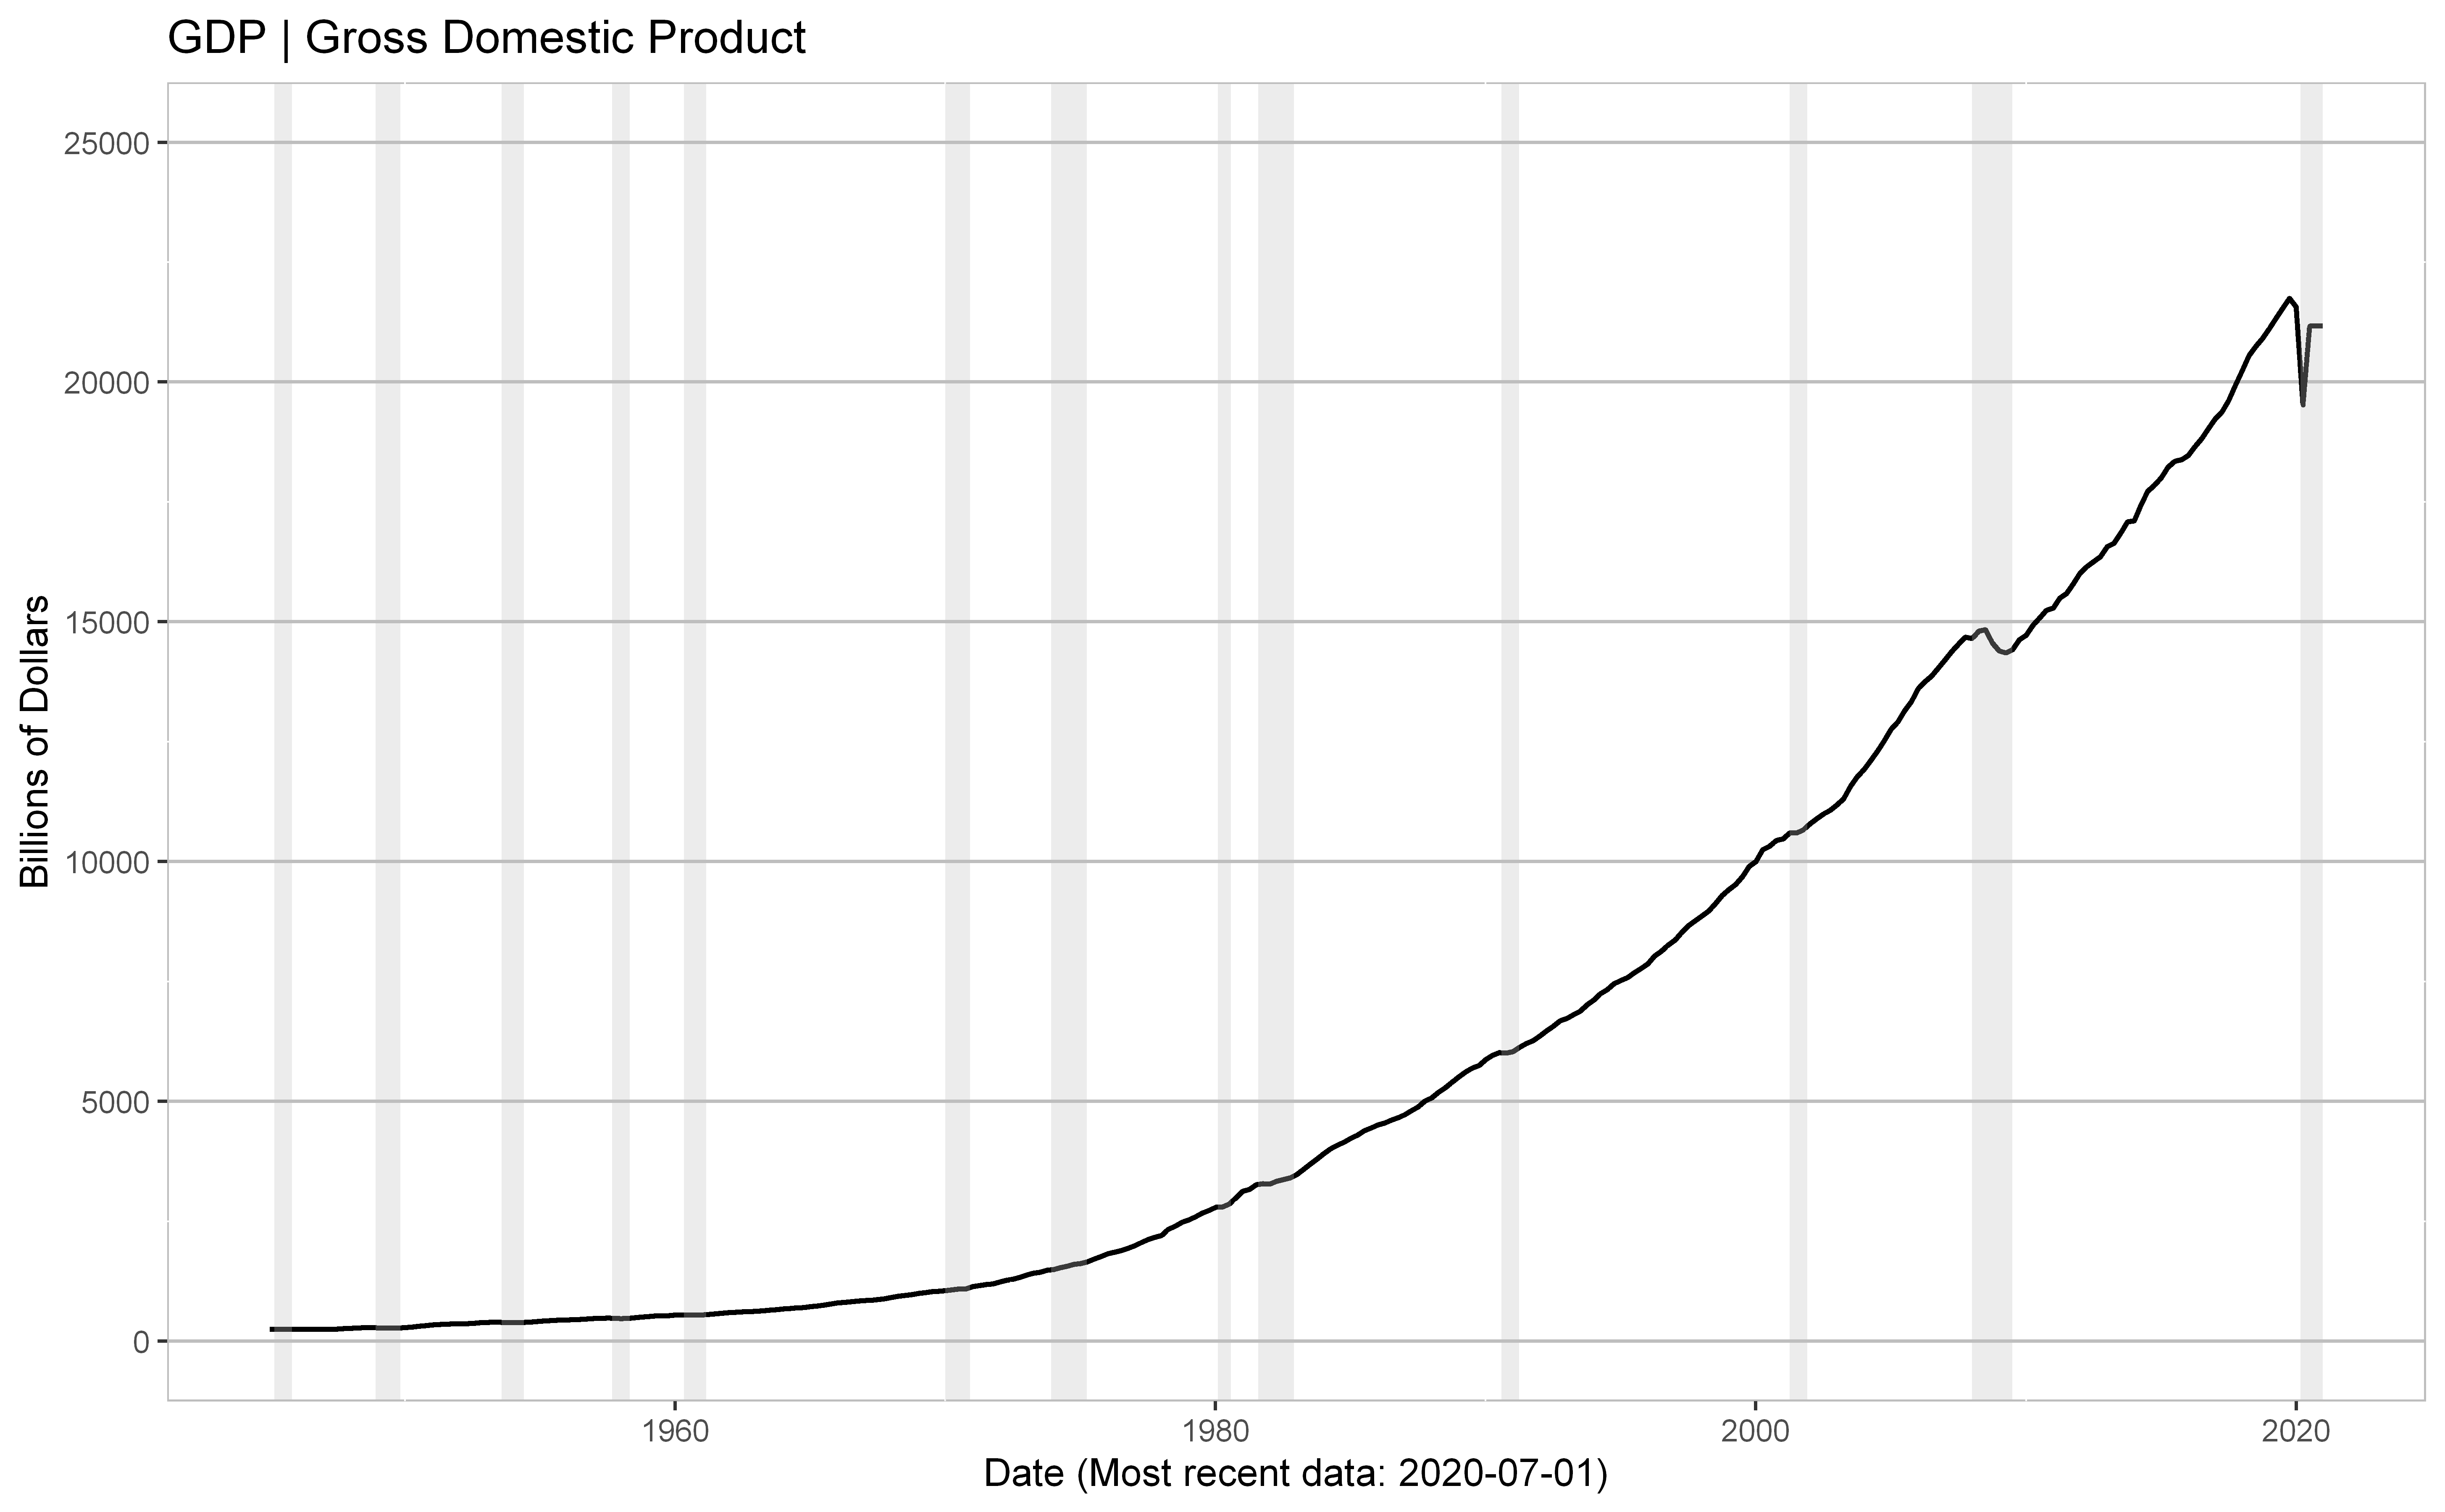

In [15]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay <- "GDP"
ylim <- c(1, 25000)
plotSingleQuick(dfRecession, df.data, datay, ylim)

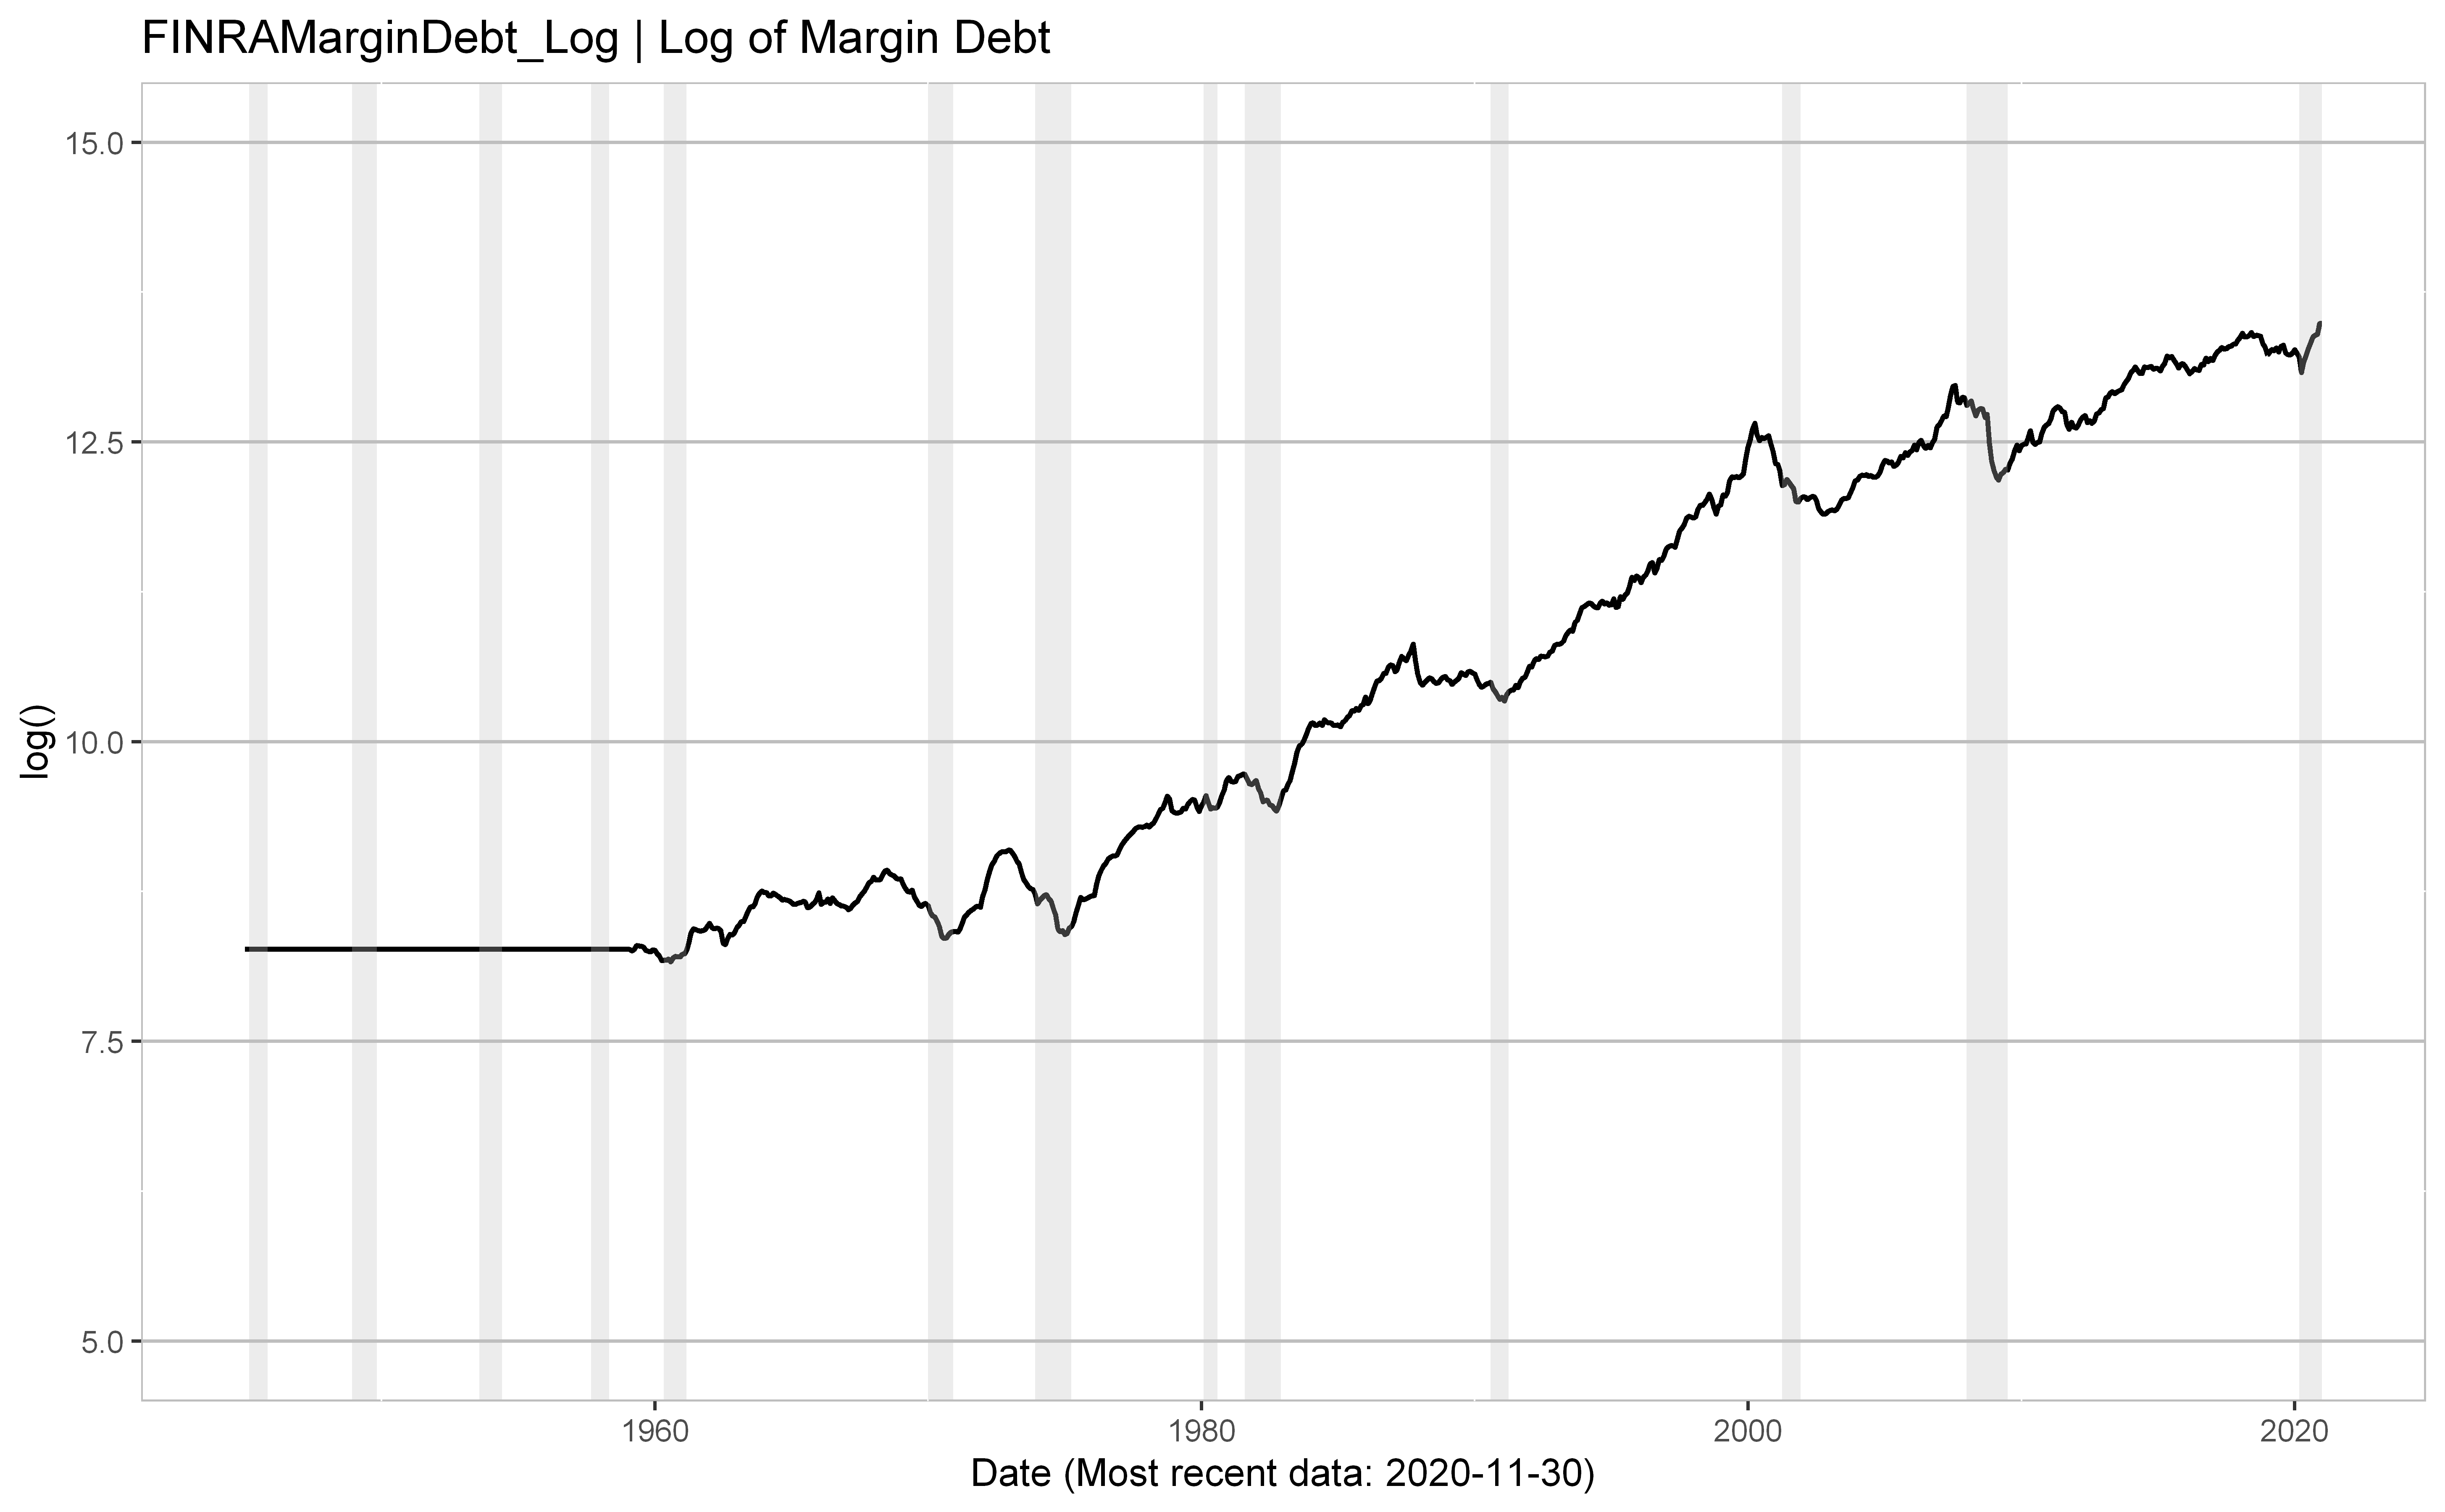

In [16]:
datay <- "FINRAMarginDebt_Log"
ylim <- c(5, 15)
plotSingleQuick(dfRecession, df.data, datay, ylim)


Normalize GSG (close) commodities by GDP deflator

In [22]:
df.data$FINRAMarginDebt.by.GDPDEF <-
  (df.data$FINRAMarginDebt / df.data$GDPDEF)
df.symbols <-
  rbind(
    df.symbols,
    data.frame(
      string.symbol = "FINRAMarginDebt.by.GDPDEF",
      string.source = "Calc",
      string.description = "Margin debt normalized by GDP defl.",
      string.label.y = "(-)",
      float.expense.ratio = -1.00,
      Max030 = FALSE,
      Max180 = FALSE,
      date.series.start =  as.Date(max(c(
        index(FINRAMarginDebt[1]), index(GDPDEF[1])
      ))) ,
      date.series.end = as.Date(min(c(
        index(tail(FINRAMarginDebt, 1)), index(tail(GDPDEF, 1))
      )))
    )
  )


Just after Christmas 2020 reports starting coming out about margin debt hitting record highs. The plot below shows data throught Nov 2020 and it looks to be taking off quickly

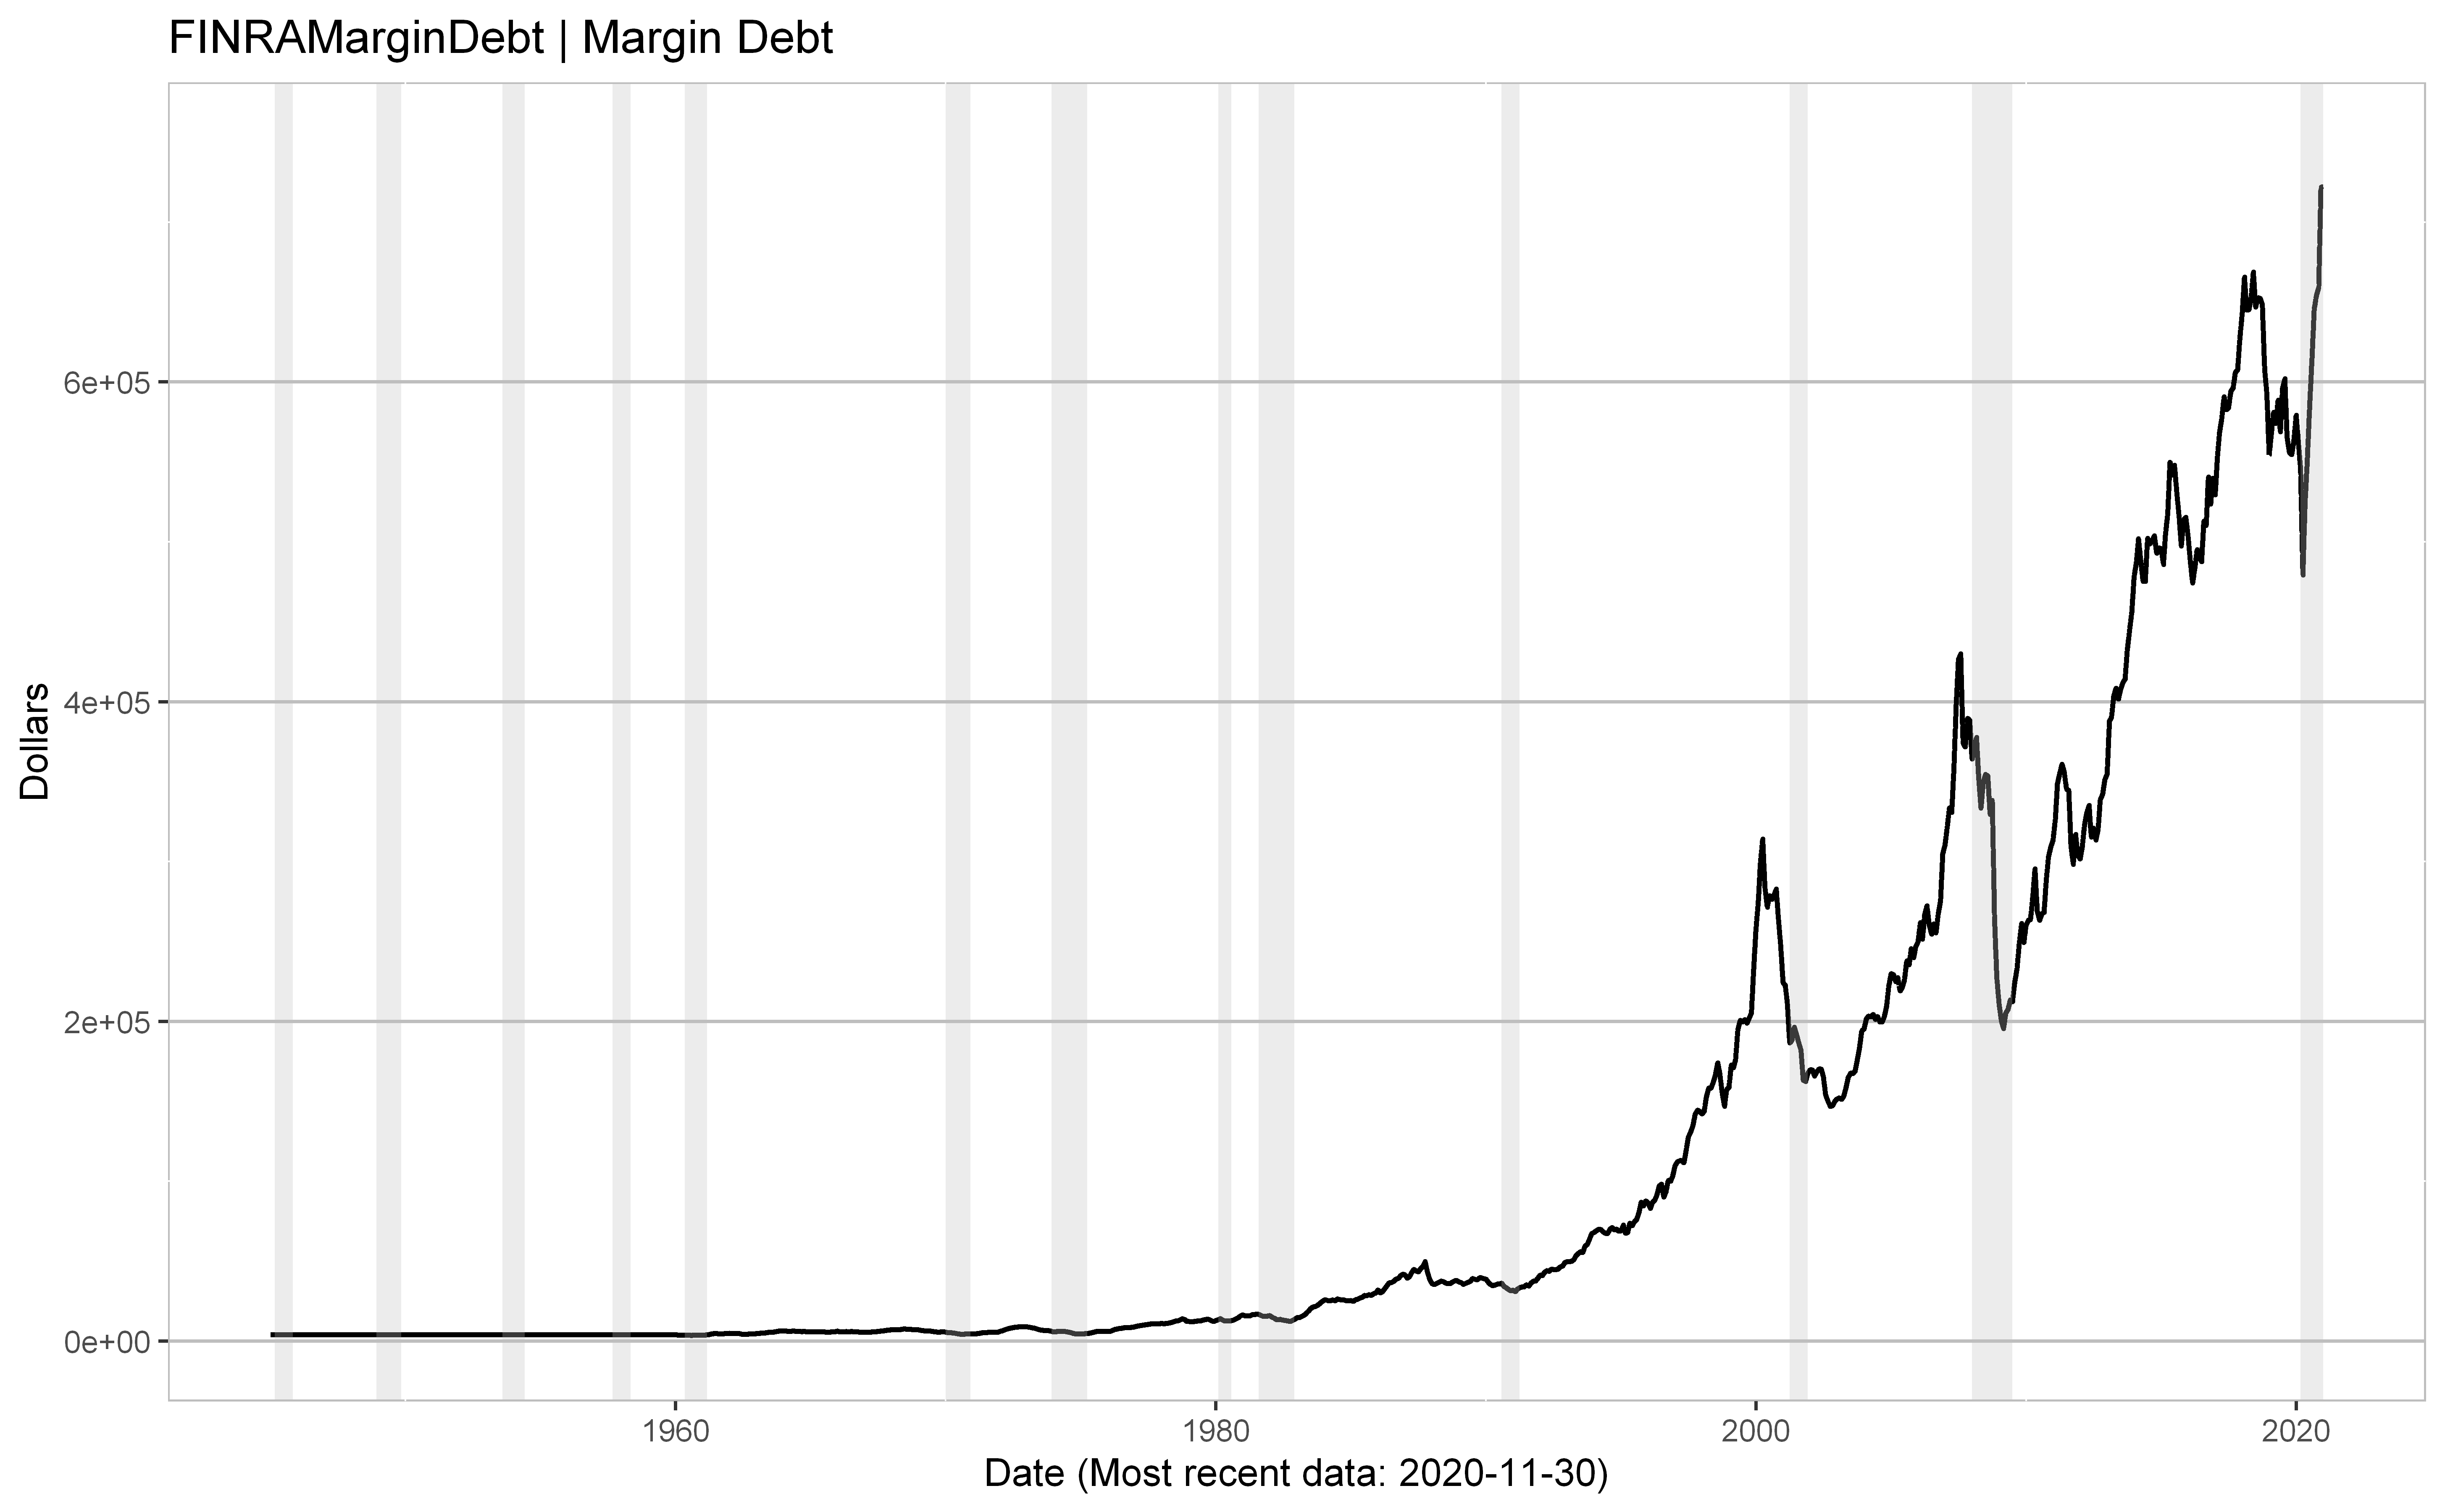

In [18]:
datay <- "FINRAMarginDebt"
ylim <- c(5, 750000)
plotSingleQuick(dfRecession, df.data, datay, ylim)

The margin debt is hitting new highs, even when normalized by the GDP deflator. This has never happened during a recession. Strange times.

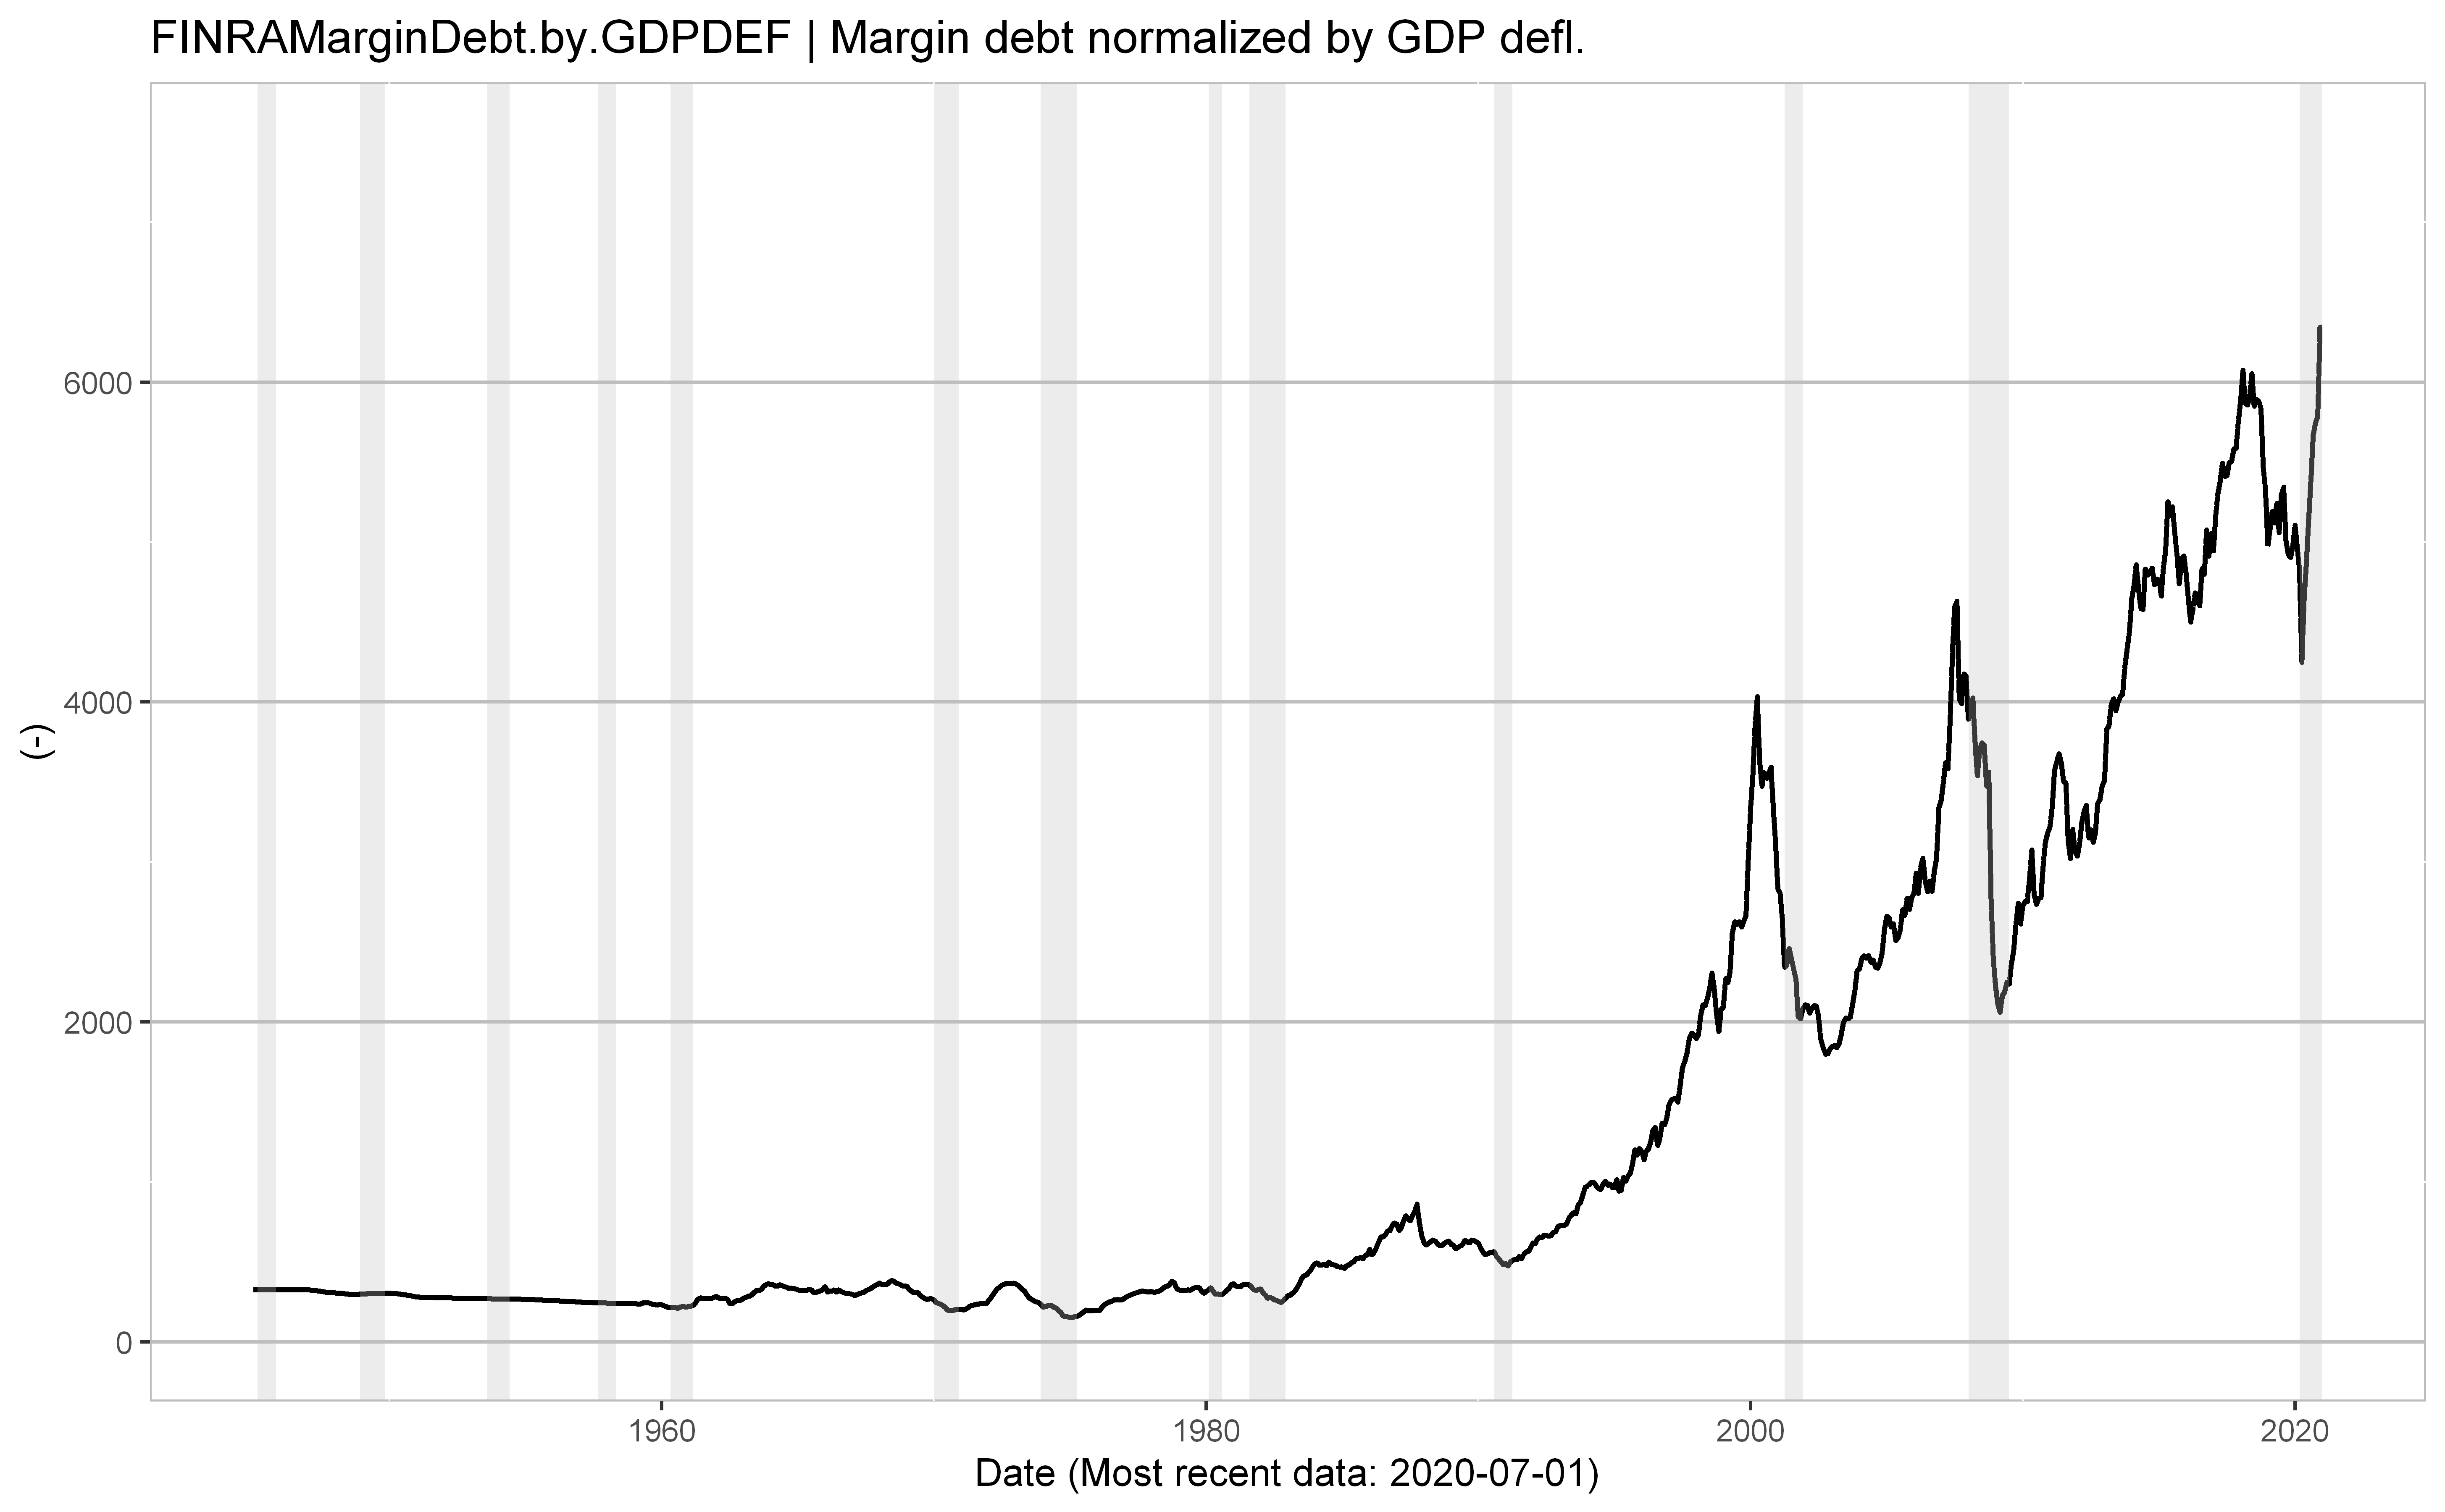

In [27]:
datay <- "FINRAMarginDebt.by.GDPDEF"
ylim <- c(5, 7500)
plotSingleQuick(dfRecession, df.data, datay, ylim)

The rate of change, showed by the smoothed first derivative, is unprecedented.

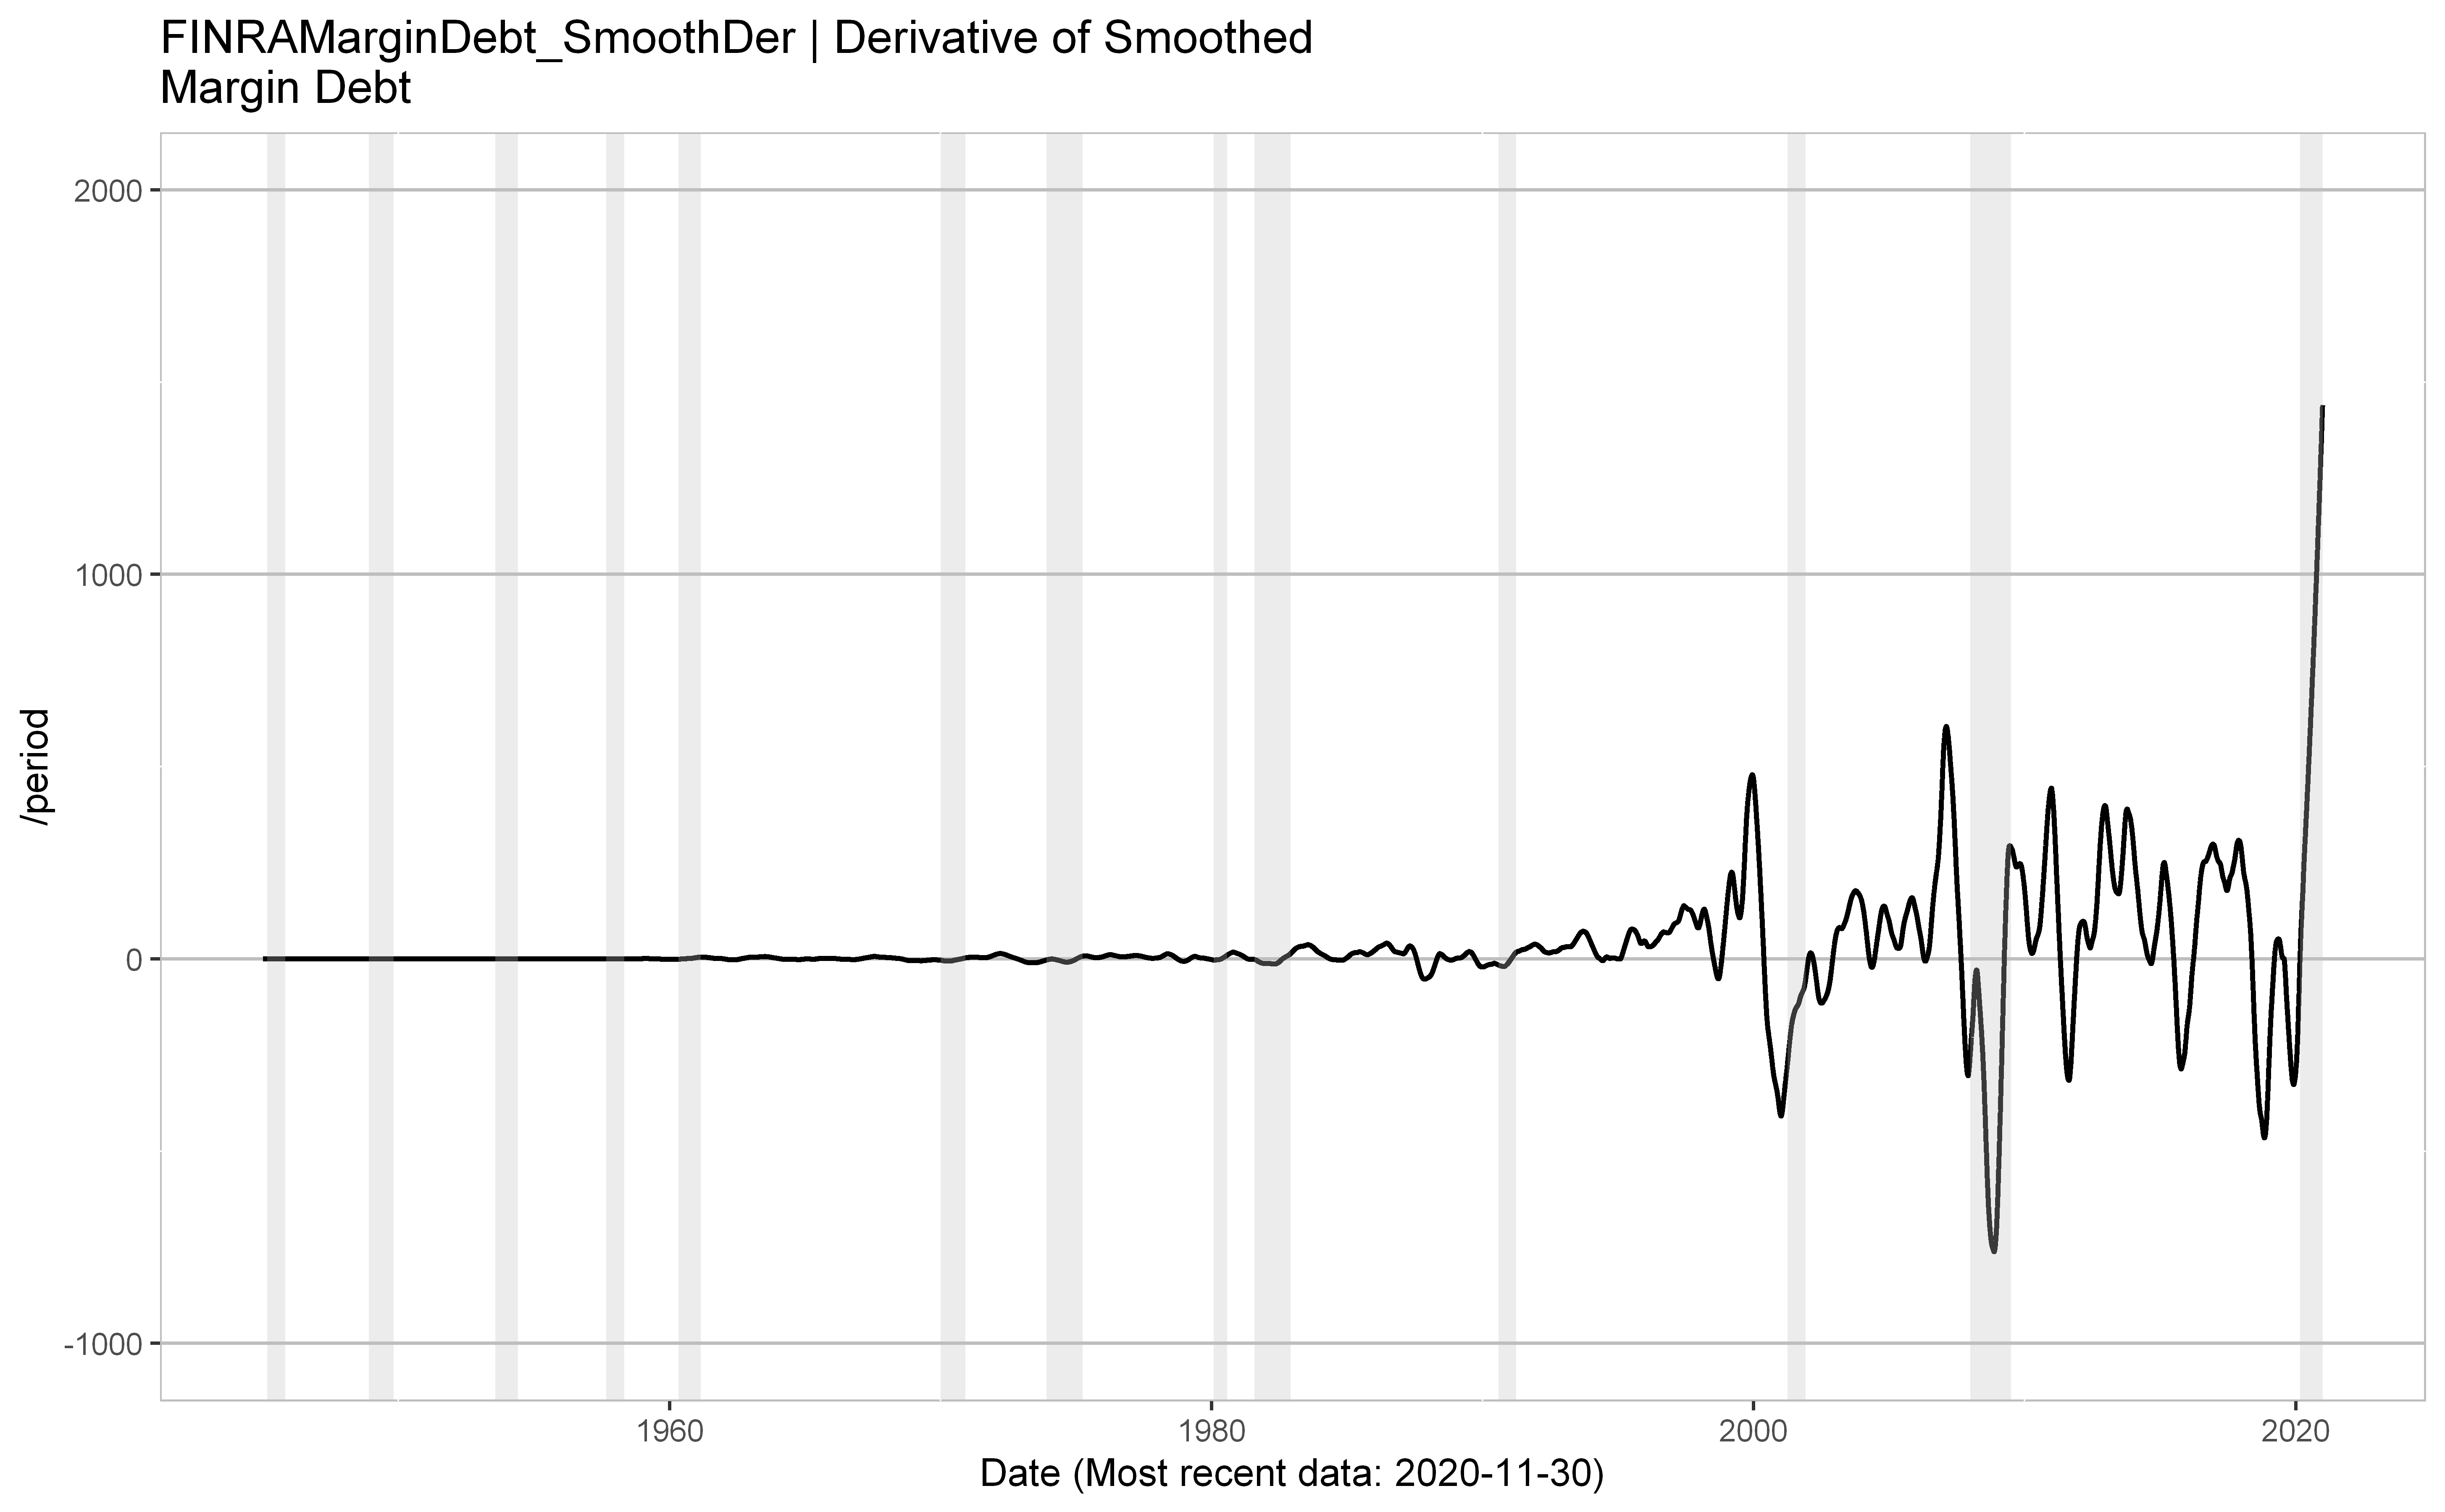

In [31]:
datay <- "FINRAMarginDebt_SmoothDer"
ylim <- c(-1000, 2000)
plotSingleQuick(dfRecession, df.data, datay, ylim)

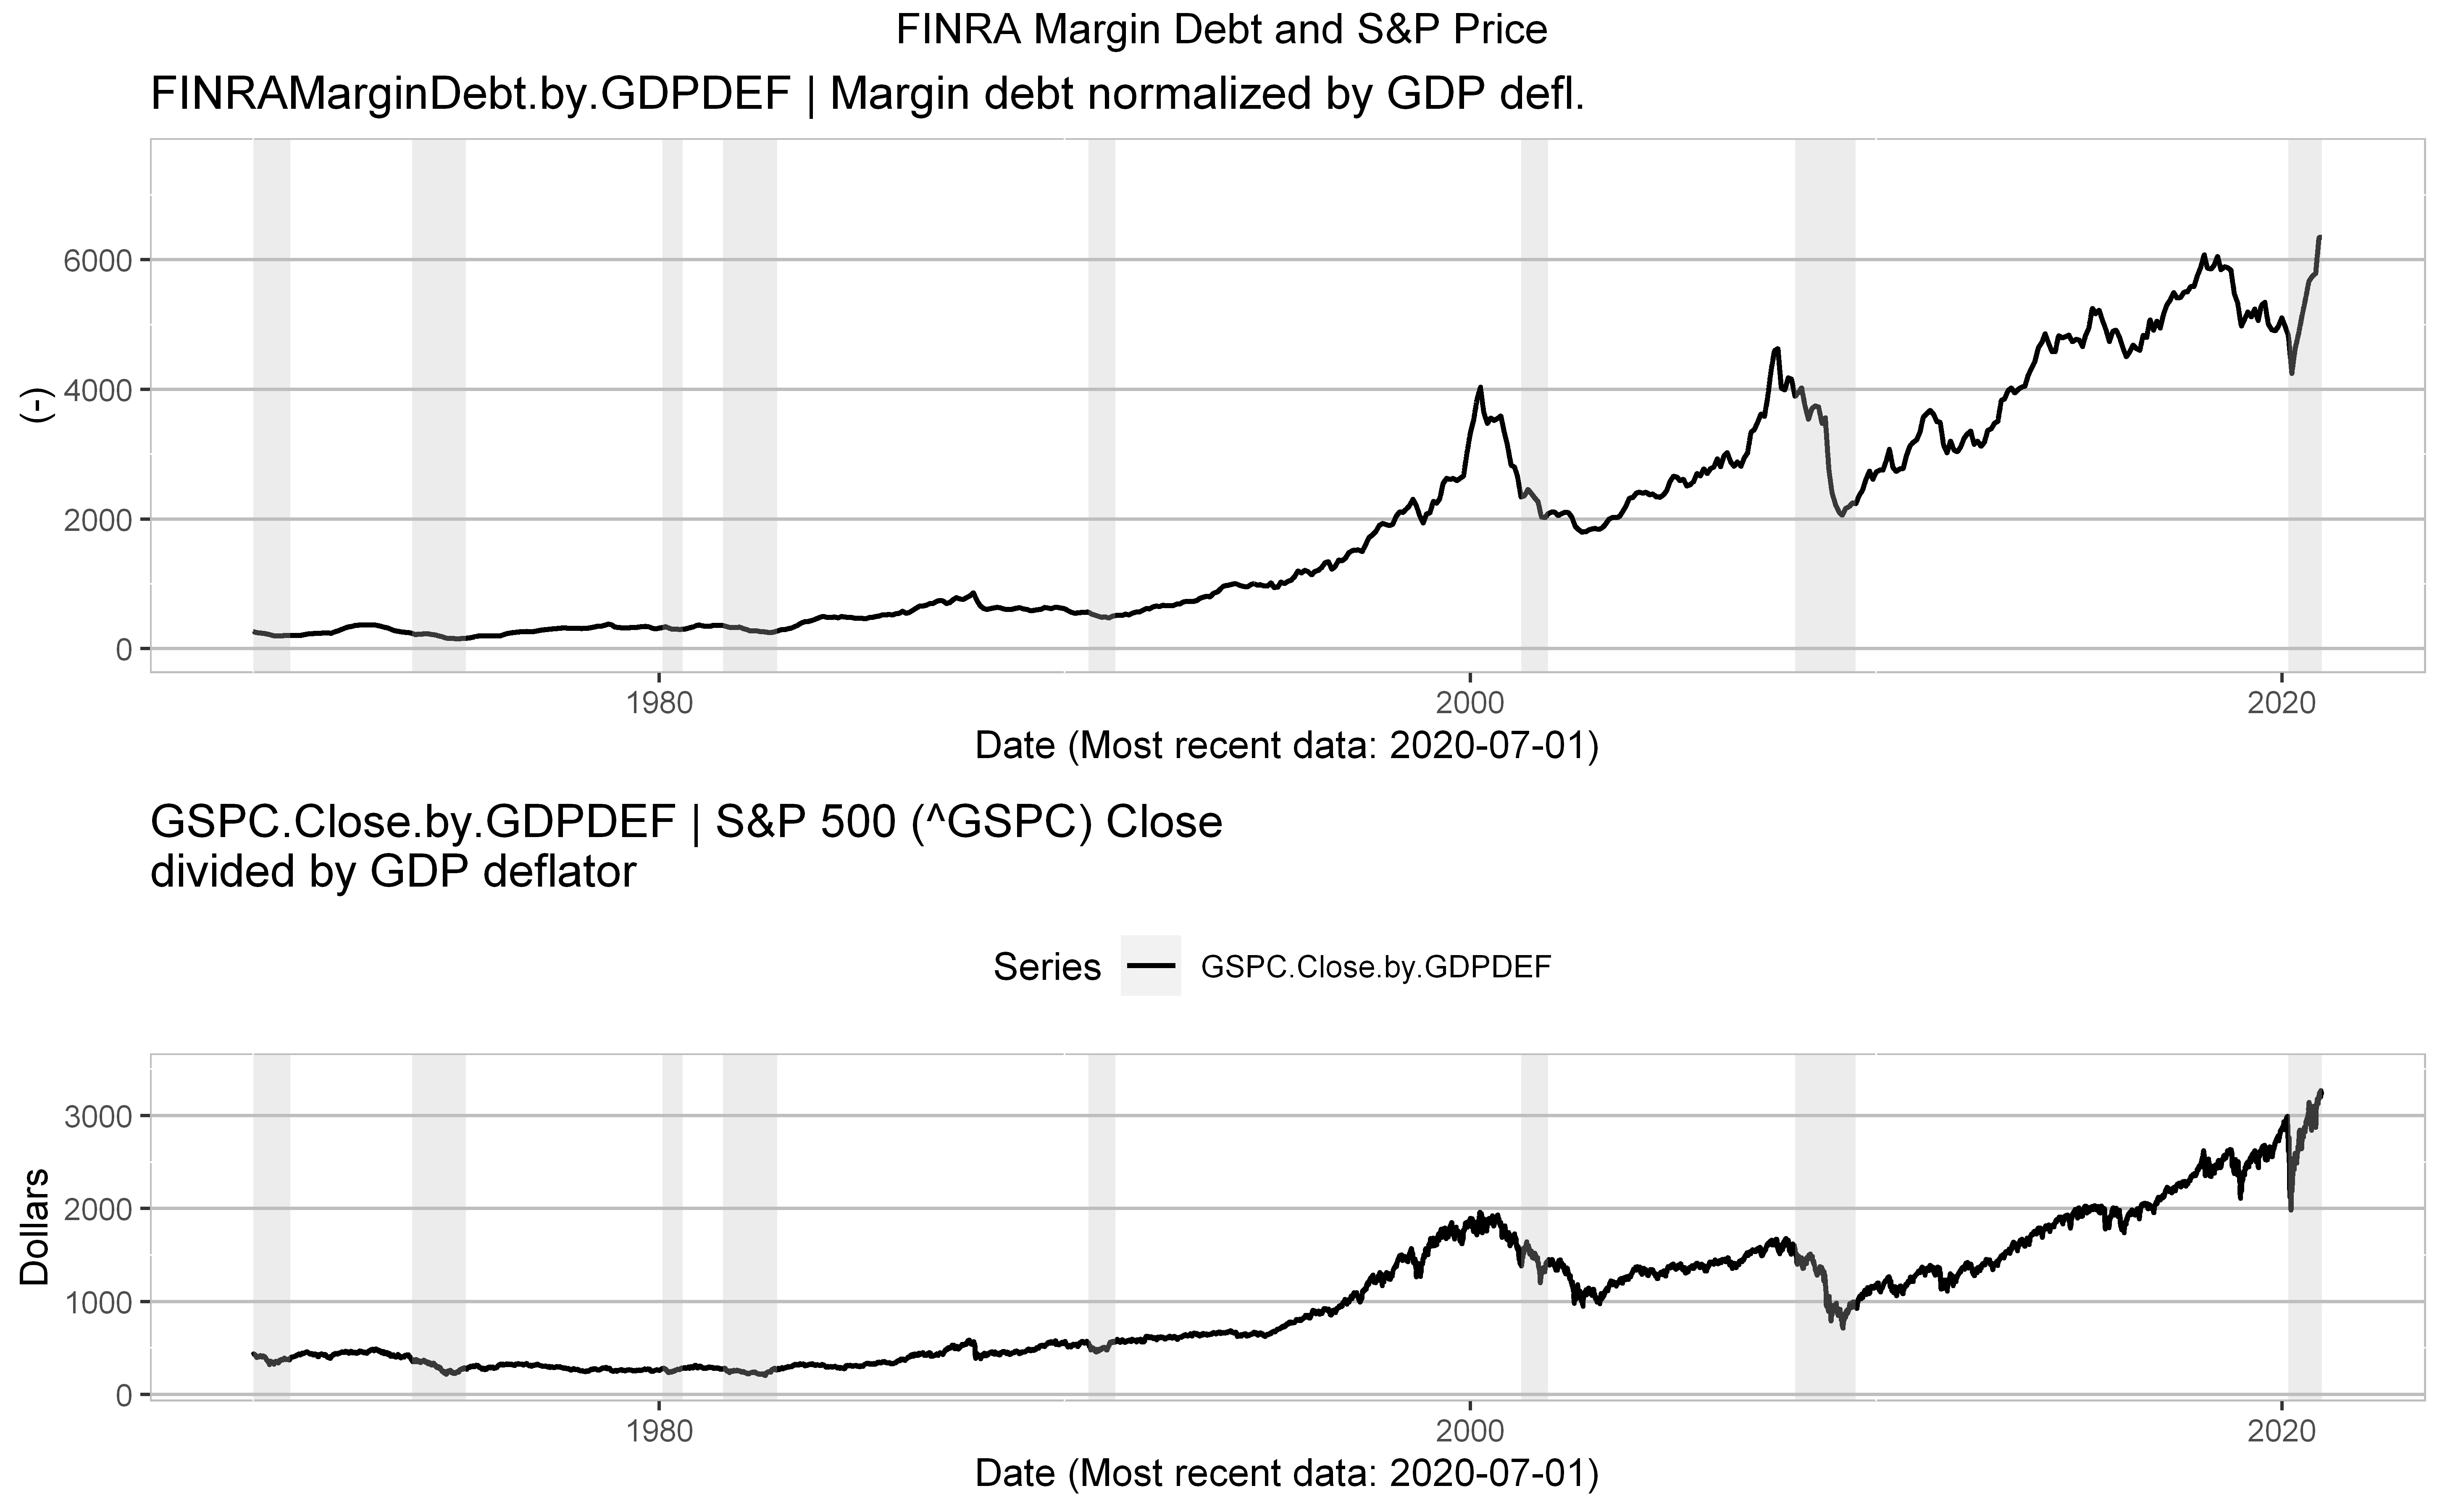

In [28]:
datay <- "FINRAMarginDebt.by.GDPDEF"
ylim <- c(0, 7500)
dtStart = as.Date('1970-01-01')
p1 <- plotSingleQuick(dfRecession, df.data, datay, ylim, dtStart)

datay <- "GSPC.Close.by.GDPDEF"
ylim <- c(100, 3500)
p2 <-
  plotSingle(
    dfRecession,
    df.data,
    "date",
    datay,
    getPlotTitle(df.symbols, datay),
    "Date",
    getPlotYLabel(df.symbols, datay),
    c(dtStart, Sys.Date()),
    ylim,
    TRUE
  )

grid.arrange(p1,
             p2,
             ncol = 1,
             top = "FINRA Margin Debt and S&P Price")


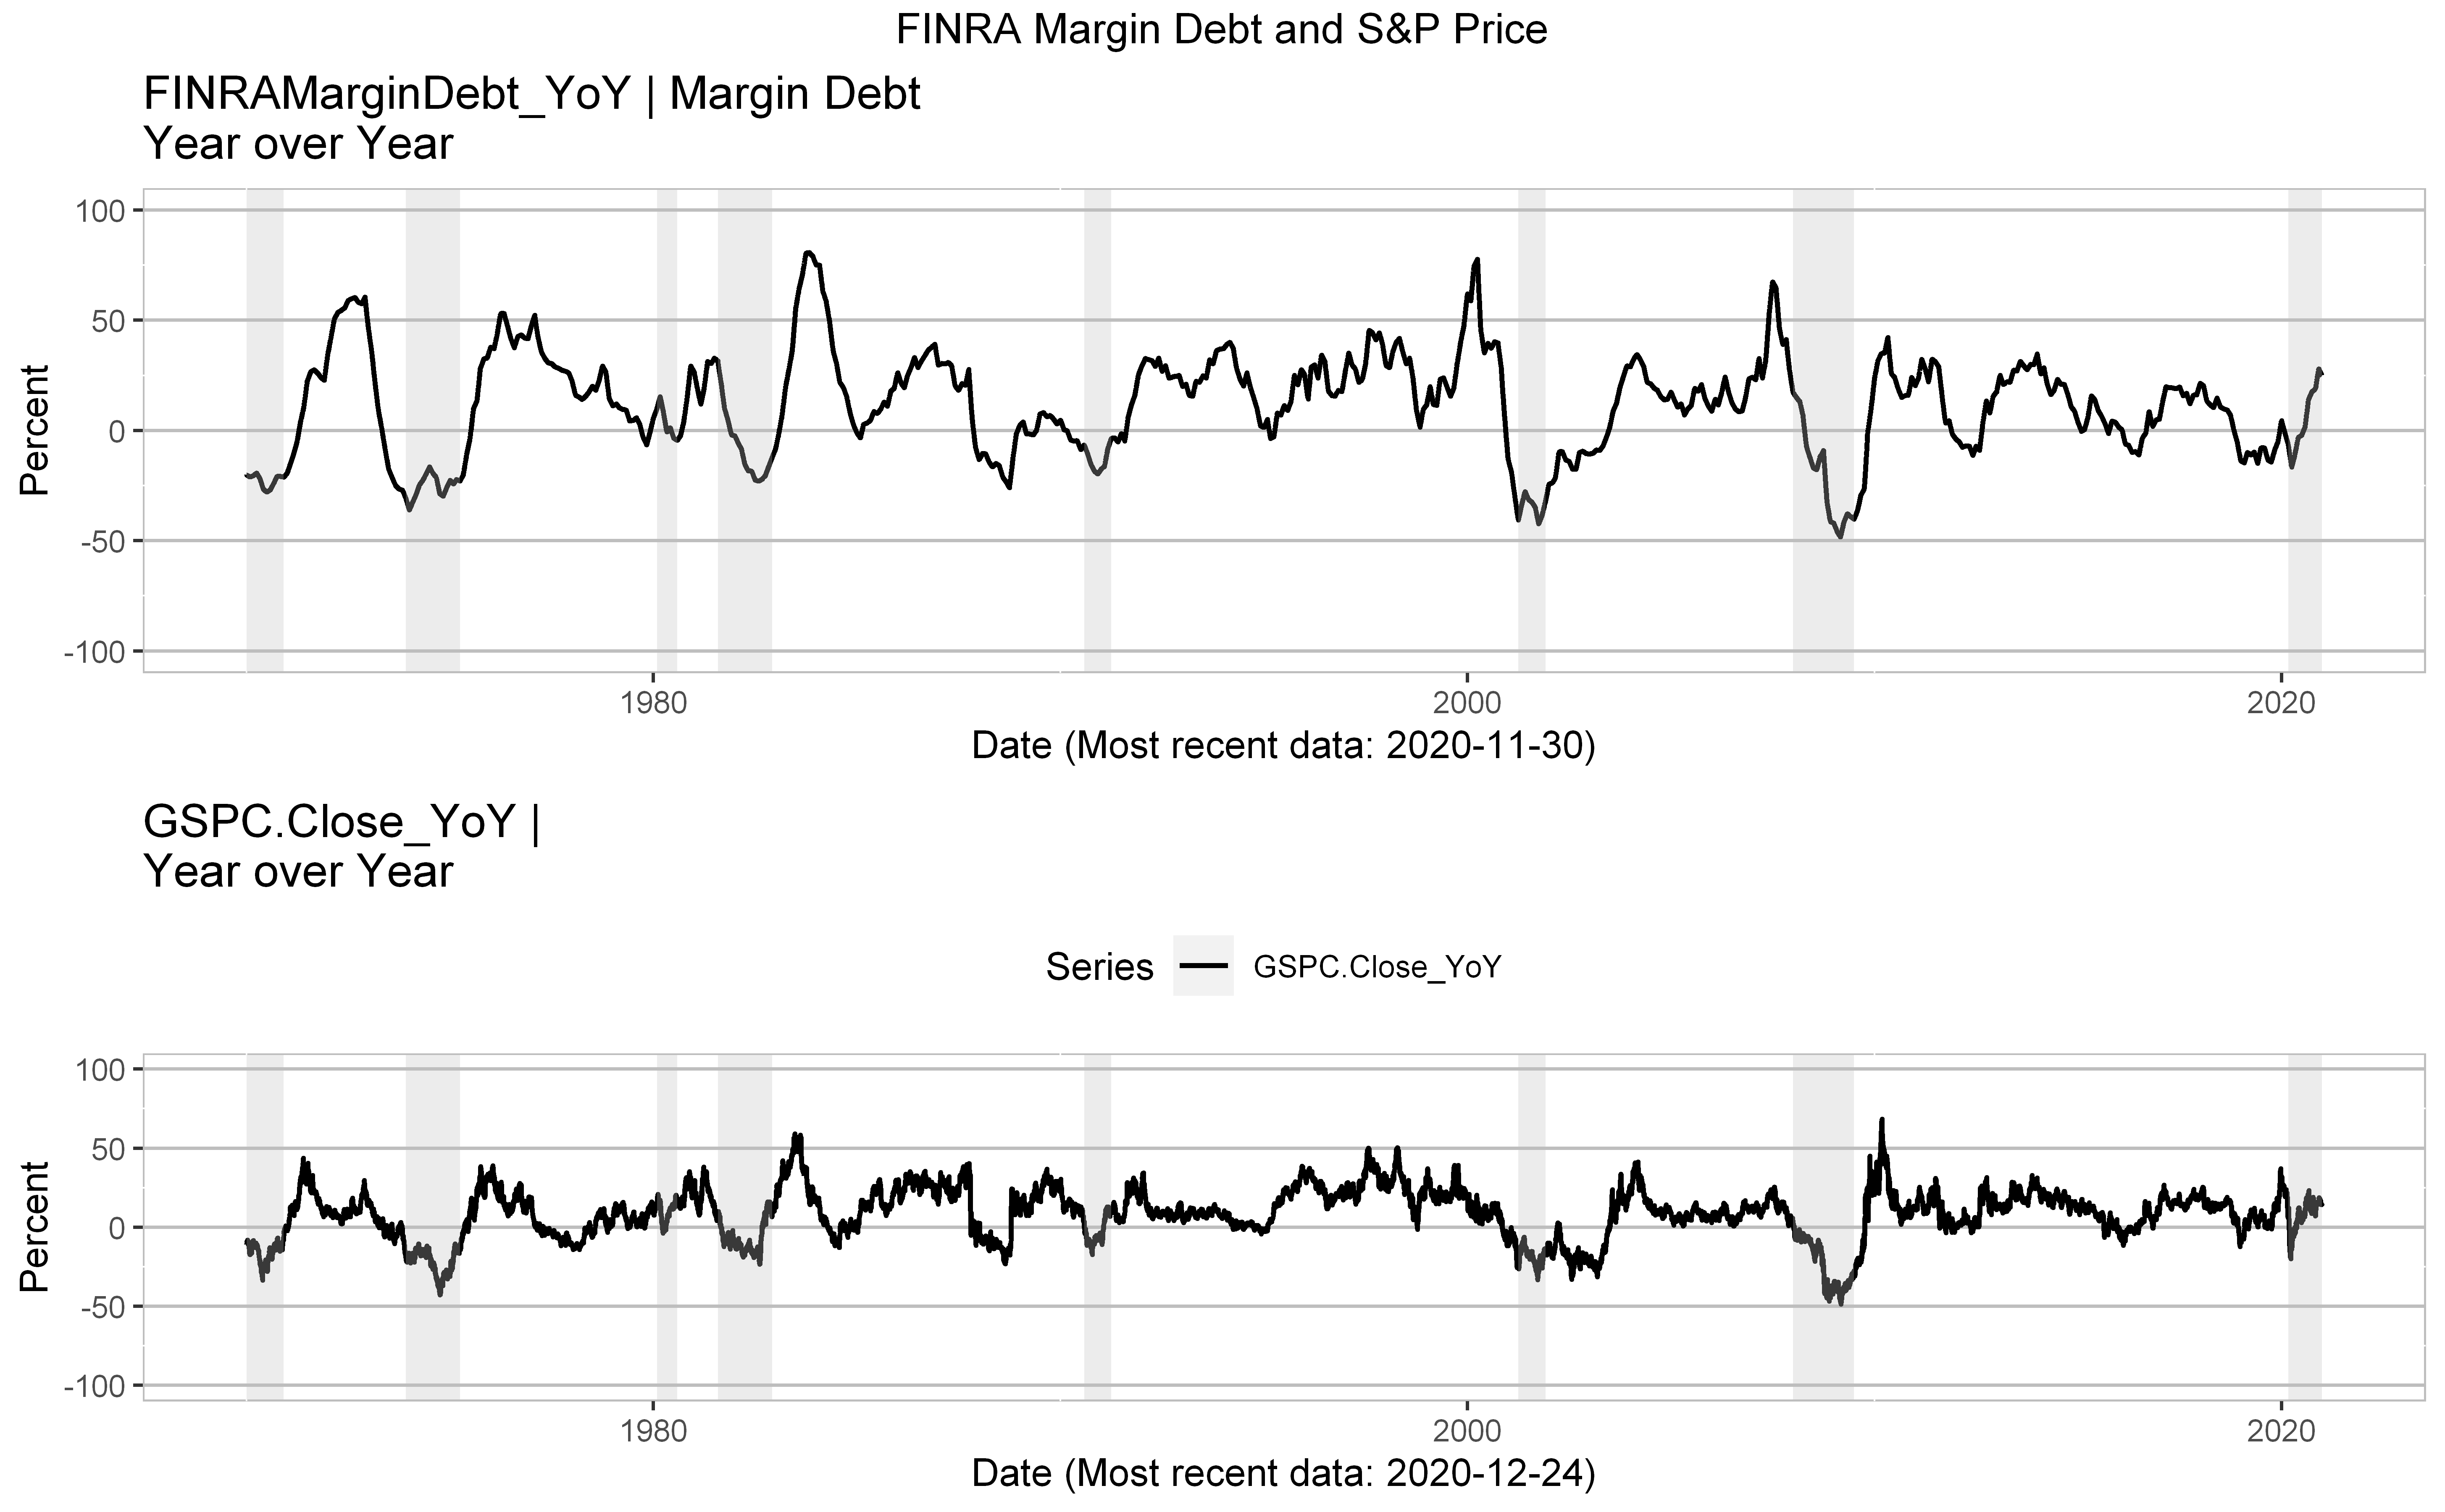

In [20]:

datay <- "FINRAMarginDebt_YoY"
ylim <- c(-100, 100)
dtStart = as.Date('1970-01-01')
p1 <- plotSingleQuick(dfRecession, df.data, datay, ylim, dtStart)

datay <- "GSPC.Close_YoY"
ylim <- c(-100, 100)
p2 <-
  plotSingle(
    dfRecession,
    df.data,
    "date",
    datay,
    getPlotTitle(df.symbols, datay),
    "Date",
    getPlotYLabel(df.symbols, datay),
    c(dtStart, Sys.Date()),
    ylim,
    TRUE
  )

grid.arrange(p1,
             p2,
             ncol = 1,
             top = "FINRA Margin Debt and S&P Price")
